# <center>WIFI 신호로 현재위치 및 빌딩 추측</center>


- ### 분석자: 박지훈
- ### 분석기간: 2017.08.10
- ### 사용자료: UJIIndoorLoc Data Set
- ### 자료출처: UCL Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/ujiindoorloc)
- ### 분석방법: OLS(Ordinary Least Square), QDA(Quadratic Discriminant Analysis)

---

### 패키지 불러오기

In [222]:
# import packages
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.preprocessing import normalize

### 데이터 불러오기

In [11]:
# data read
raw_train = pd.read_csv("trainingData.csv")
raw_validation = pd.read_csv("validationData.csv")

In [187]:
raw_train.head(n=10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
5,100,100,100,100,100,100,100,100,100,100,...,100,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841
6,100,100,100,100,100,100,100,100,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883
7,100,100,100,100,100,100,100,100,100,100,...,100,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775
8,100,100,100,100,100,100,100,100,100,100,...,100,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307
9,100,100,100,100,100,100,100,100,100,100,...,100,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128


In [186]:
raw_validation.head(n=10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
5,100,100,100,100,100,100,100,100,100,100,...,100,-7338.807210,4.864825e+06,2,2,0,0,0,12,1380874853
6,100,100,100,100,100,100,100,100,100,100,...,100,-7379.351683,4.864849e+06,3,2,0,0,0,20,1380874982
7,100,100,100,100,100,100,100,100,100,100,...,100,-7340.558777,4.864759e+06,3,2,0,0,0,21,1380875085
8,100,100,100,100,100,100,100,100,100,100,...,100,-7357.531253,4.864766e+06,2,2,0,0,0,12,1380875092
9,100,100,100,100,100,100,100,100,100,100,...,100,-7345.085170,4.864831e+06,0,2,0,0,0,20,1380875118


### EDA(탐색적 시각화)
랜덤으로 칼럼을 추출하여 데이터 분포양상 확인

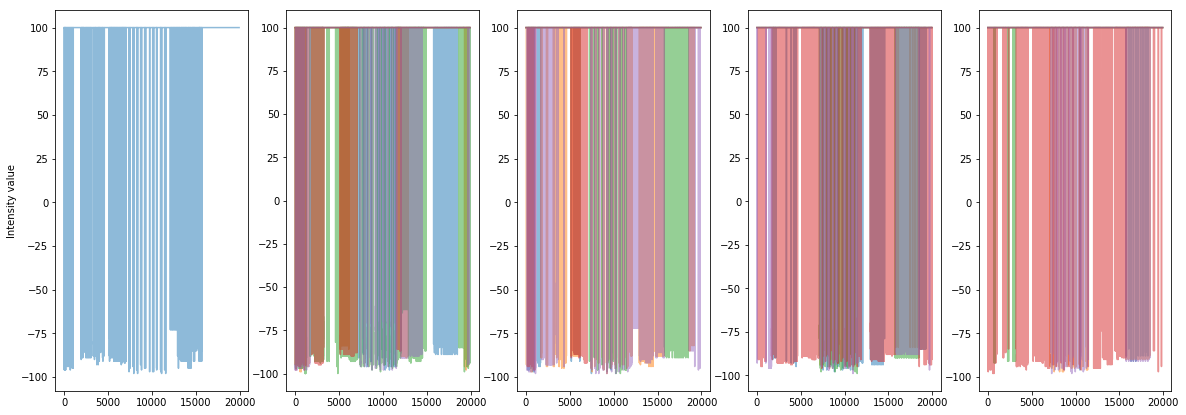

In [233]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 5, 1)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 1)], alpha=0.5)
plt.ylabel("Intensity value")
plt.subplot(1, 5, 2)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.subplot(1, 5, 3)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.subplot(1, 5, 4)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.subplot(1, 5, 5)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.show()

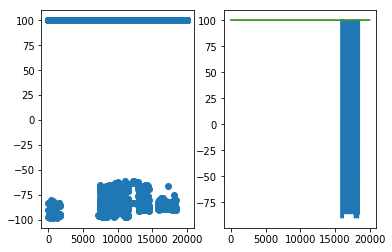

In [205]:
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(raw_train)), raw_train.iloc[:, 7])
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(raw_train)), raw_train.iloc[:, 1:4].values)
plt.show()

In [232]:
np.size(raw_train, axis=1)-10

519

### 변수 정규화

In [235]:
scale(raw_train.iloc[:, :520])

array([[ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ],
       [ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ],
       [ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ],
       ..., 
       [ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ],
       [ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ],
       [ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ]])

In [237]:
normalize(raw_train.iloc[:, :520])

array([[ 0.04412907,  0.04412907,  0.04412907, ...,  0.04412907,
         0.04412907,  0.04412907],
       [ 0.04411699,  0.04411699,  0.04411699, ...,  0.04411699,
         0.04411699,  0.04411699],
       [ 0.0440411 ,  0.0440411 ,  0.0440411 , ...,  0.0440411 ,
         0.0440411 ,  0.0440411 ],
       ..., 
       [ 0.04388709,  0.04388709,  0.04388709, ...,  0.04388709,
         0.04388709,  0.04388709],
       [ 0.04403871,  0.04403871,  0.04403871, ...,  0.04403871,
         0.04403871,  0.04403871],
       [ 0.04402676,  0.04402676,  0.04402676, ...,  0.04402676,
         0.04402676,  0.04402676]])

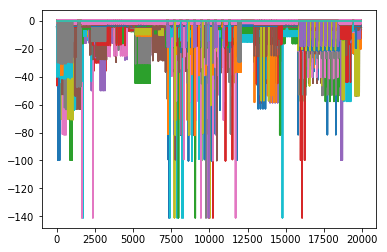

In [241]:
plt.plot(scale(raw_train.iloc[:, :520]))
plt.show()

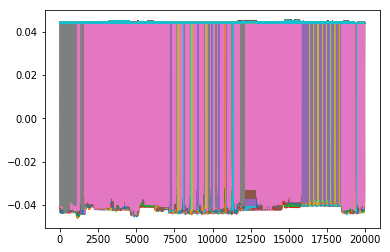

In [244]:
plt.plot(normalize(raw_train.iloc[:, :520]))
plt.show()

In [279]:
scale_train = scale(raw_train.iloc[:, :520])
scale_validation = scale(raw_validation.iloc[:, :520])

nor_train = normalize(raw_train.iloc[:, :520])
nor_validation = normalize(raw_validation.iloc[:, :520])

### One-Hot-Encoding
층 수, 빌딩 번호는 명목변수이기 때문에 정수 표현을 위해서는 One-Hot-Encoding이 필요

In [278]:
OHE = OneHotEncoder(dtype=int)
a = OHE.fit(raw_train.iloc[:, [522, 523, 527]])
b = a.transform(raw_train.iloc[:, [522, 523, 527]]).toarray()
c = pd.DataFrame(b)
c.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [280]:
type(scale_train)

numpy.ndarray

In [254]:
raw_train.iloc[:, 522:528].head()

,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID
0,2,1,106,2,2,23
1,2,1,106,2,2,23
2,2,1,103,2,2,23
3,2,1,102,2,2,23
4,0,0,122,2,11,13


In [255]:
raw_validation.iloc[:, 522:528].head()

,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID
0,1,1,0,0,0,0
1,4,2,0,0,0,13
2,4,2,0,0,0,13
3,4,2,0,0,0,13
4,2,0,0,0,0,2
